In [64]:
import tensorflow as tf

import numpy as np

import pylab as pl
%pylab inline

import pandas as pd
from pandas import Series, DataFrame

Populating the interactive namespace from numpy and matplotlib


C:\Users\sakalos\moje\python\WinPython\WinPython-64bit-3.5.2.3\python-3.5.2.amd64\lib\site-packages\IPython\core\magics\pylab.py:161: UserWarning: pylab import has clobbered these variables: ['show']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


# Data

In [97]:
import os
import struct
import numpy as np

"""
Loosely inspired by http://abel.ee.ucla.edu/cvxopt/_downloads/mnist.py
which is GPL licensed.
"""

def read(dataset = "training", path = "."):
    """
    Python function for importing the MNIST data set.  It returns an iterator
    of 2-tuples with the first element being the label and the second element
    being a numpy.uint8 2D array of pixel data for the given image.
    """

    if dataset is "training":
        fname_img = os.path.join(path, 'train-images-idx3-ubyte')
        fname_lbl = os.path.join(path, 'train-labels-idx1-ubyte')
    elif dataset is "testing":
        fname_img = os.path.join(path, 't10k-images-idx3-ubyte')
        fname_lbl = os.path.join(path, 't10k-labels-idx1-ubyte')
    else:
        raise ValueError( "dataset must be 'testing' or 'training'")

    # Load everything in some numpy arrays
    with open(fname_lbl, 'rb') as flbl:
        magic, num = struct.unpack(">II", flbl.read(8))
        lbl = np.fromfile(flbl, dtype=np.int8)

    with open(fname_img, 'rb') as fimg:
        magic, num, rows, cols = struct.unpack(">IIII", fimg.read(16))
        img = np.fromfile(fimg, dtype=np.uint8).reshape(len(lbl), rows, cols)

    get_img = lambda idx: (lbl[idx], img[idx])

    # Create an iterator which returns each image in turn
    for i in range(len(lbl)):
        yield get_img(i)

def show(image):
    """
    Render a given numpy.uint8 2D array of pixel data.
    """
    if (image.ndim == 1):
        image = image.reshape((28, 28))
        
    fig = pl.figure()
    ax = fig.add_subplot(1,1,1)
    imgplot = ax.imshow(image, cmap=mpl.cm.Greys)
    imgplot.set_interpolation('nearest')
    ax.xaxis.set_ticks_position('top')
    ax.yaxis.set_ticks_position('left')
    

In [77]:
labels, images = zip( *read(path = r"D:\in_data\MNIST" ))

In [78]:
labels = np.array(labels)
images = np.array([ img.flatten() for img in images])

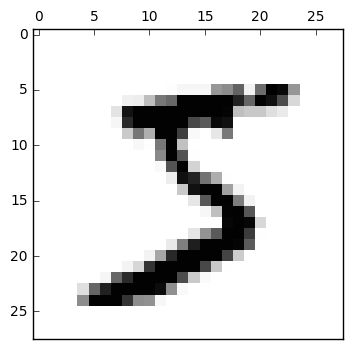

In [98]:
show(images[0])

In [79]:
labels_dummy = pd.get_dummies(labels)

In [80]:
labels_dummy.head()

,0,1,2,3,4,5,6,7,8,9
0,0,0,0,0,0,1,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0
2,0,0,0,0,1,0,0,0,0,0
3,0,1,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,1


# Regression

In [70]:
x = tf.placeholder(tf.float32, [None, 28**2], name = "x")
W = tf.Variable(tf.zeros( [28**2, 10]), name = "W")
b = tf.Variable(tf.zeros(10), name = "b")

In [72]:
y = tf.nn.softmax(tf.matmul(x, W) + b)

In [87]:
with tf.Session().as_default():
    pp = y.eval({
        x: images[:5],
        W: np.zeros( [28**2, 10]),
        b:np.zeros(10), 
    })
    print(pp)
    
    

[[ 0.1  0.1  0.1  0.1  0.1  0.1  0.1  0.1  0.1  0.1]
 [ 0.1  0.1  0.1  0.1  0.1  0.1  0.1  0.1  0.1  0.1]
 [ 0.1  0.1  0.1  0.1  0.1  0.1  0.1  0.1  0.1  0.1]
 [ 0.1  0.1  0.1  0.1  0.1  0.1  0.1  0.1  0.1  0.1]
 [ 0.1  0.1  0.1  0.1  0.1  0.1  0.1  0.1  0.1  0.1]]


In [89]:
y_ = tf.placeholder(tf.float32, [None, 10], name = "y_observed")

In [90]:
cross_entropy = tf.reduce_mean( - tf.reduce_sum(y_ * tf.log(y), axis=1))

In [160]:
train_step = tf.train.GradientDescentOptimizer(0.05).minimize(cross_entropy)

In [161]:
sess = tf.InteractiveSession()

In [189]:
tf.global_variables_initializer().run()

In [205]:
predictions = y.eval({x: images}).argmax(axis=1)

In [206]:
predictions[-20:]

array([0, 6, 0, 0, 8, 2, 6, 0, 7, 8, 9, 2, 7, 0, 1, 8, 3, 8, 0, 8], dtype=int64)

In [202]:
labels[-20:]

array([3, 6, 6, 2, 1, 2, 6, 0, 7, 8, 9, 2, 9, 5, 1, 8, 3, 5, 6, 8], dtype=int8)

label = 6 ; prediction = 0


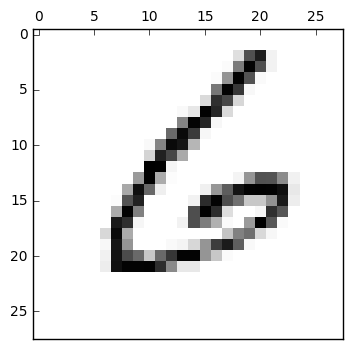

In [220]:
i = -2
print("label =", labels[i], "; prediction =", predictions[i])
show(images[i])

In [221]:
sum( 
    (predictions - labels) != 0
) / len(labels)

0.28389999999999999

In [171]:
W.eval().shape

(784, 10)

In [173]:
sess.run(W)

array([[ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       ..., 
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.]], dtype=float32)

In [191]:
train_step.run(
    feed_dict = {
        x: images[:5000],
        y_: labels_dummy[:5000] 
    }
)

In [124]:
sess.run(
    fetches = [train_step, cross_entropy],
    feed_dict = {
        x: images[:5],
        #W: np.zeros( [28**2, 10]),
        #b: np.zeros(10), 
        y_: labels_dummy[:5] 
    }
)

[None, nan]

In [121]:
train_step.run({
    x: images[:5],
    #W: np.zeros( [28**2, 10]),
    #b: np.zeros(10), 
    y_: labels_dummy[:5] 
})
    


In [120]:
train_step.outputs

[]

In [100]:
train_step, cross_entropy

(<tf.Operation 'GradientDescent' type=NoOp>,
 <tf.Tensor 'Mean:0' shape=() dtype=float32>)

In [9]:
x = tf.placeholder(tf.float64, shape = [10], name = "x")

In [10]:
train_step.run()

<tf.Tensor 'x:0' shape=(10,) dtype=float64>

In [12]:
a = tf.Variable(initial_value=1, dtype = tf.float64, expected_shape=[], name = "a")

In [15]:
f = a * x
f

<tf.Tensor 'mul_2:0' shape=(10,) dtype=float64>

In [17]:
f.get_shape()

TensorShape([Dimension(10)])

In [21]:
with tf.Session().as_default():
    print(f.eval({a: 2, x: np.arange(10)}))

[  0.   2.   4.   6.   8.  10.  12.  14.  16.  18.]


In [222]:
import pydot

In [223]:
import graphviz